<a href="https://colab.research.google.com/github/OcSpice/Sentiment-Dataset-EDA/blob/main/EDA_on_Sentiment_Dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **EDA on Sentiment Dataset**

## 1️⃣ **Title & Introduction**

### **Level 1 – Task 2: Exploratory Data Analysis (EDA) on Sentiment Dataset**  

#### 🎯 **Objective**
To explore the sentiment dataset, clean it, and uncover insights such as:  
- Sentiment distribution (Positive/Negative/Neutral).  
- Engagement patterns (Likes, Retweets) across sentiments and platforms.  
- Temporal patterns (hour of day, day of week).  
- Geographic distribution of sentiments.  

Dataset Path: `/content/Level 1/3) Sentiment dataset.csv`

## 2️⃣ **Load & Inspect Data**

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('/content/Level 1/3) Sentiment dataset.csv')
df.head()

,Unnamed: 0.1,Unnamed: 0,Text,Sentiment,Timestamp,User,Platform,Hashtags,Retweets,Likes,Country,Year,Month,Day,Hour
0,0,0,Enjoying a beautiful day at the park! ...,Positive,2023-01-15 12:30:00,User123,Twitter,#Nature #Park,15.0,30.0,USA,2023,1,15,12
1,1,1,Traffic was terrible this morning. ...,Negative,2023-01-15 08:45:00,CommuterX,Twitter,#Traffic #Morning,5.0,10.0,Canada,2023,1,15,8
2,2,2,Just finished an amazing workout! 💪 ...,Positive,2023-01-15 15:45:00,FitnessFan,Instagram,#Fitness #Workout,20.0,40.0,USA,2023,1,15,15
3,3,3,Excited about the upcoming weekend getaway! ...,Positive,2023-01-15 18:20:00,AdventureX,Facebook,#Travel #Adventure,8.0,15.0,UK,2023,1,15,18
4,4,4,Trying out a new recipe for dinner tonight. ...,Neutral,2023-01-15 19:55:00,ChefCook,Instagram,#Cooking #Food,12.0,25.0,Australia,2023,1,15,19


## **Step 1: Data Overview**
Firstly, I inspect the structure of the dataset (columns, data types, number of rows).  
Key columns include **Text, Sentiment, Platform, Retweets, Likes, Country, Timestamp, and temporal features** (Year, Month, Day, Hour).

## 3️⃣ **Cleaning Data**

### **Drop unnecessary ID columns**

In [3]:
df = df.drop(columns=['Unnamed: 0', 'Unnamed: 0.1'])

### **Check for missing values**

In [4]:
print(df.isnull().sum())

Text         0
Sentiment    0
Timestamp    0
User         0
Platform     0
Hashtags     0
Retweets     0
Likes        0
Country      0
Year         0
Month        0
Day          0
Hour         0
dtype: int64


## **Step 2: Data Cleaning**
- Removed unnecessary ID columns.  
- Checked for missing values and duplicates.  
- Dataset is now consistent and ready for analysis.

### **Drop duplicates**

In [5]:
df = df.drop_duplicates()

## 4️⃣ **Sentiment Distribution**

In [6]:
# Check what unique values exist in the Sentiment column
df['Sentiment'].unique()[:20]   # preview first 20

array([' Positive  ', ' Negative  ', ' Neutral   ', ' Anger        ',
       ' Fear         ', ' Sadness      ', ' Disgust      ',
       ' Happiness    ', ' Joy          ', ' Love         ',
       ' Amusement    ', ' Enjoyment    ', ' Admiration   ',
       ' Affection    ', ' Awe          ', ' Disappointed ',
       ' Surprise     ', ' Acceptance   ', ' Adoration    ',
       ' Anticipation '], dtype=object)

In [7]:
df['Sentiment'] = df['Sentiment'].str.strip().str.lower()

In [8]:
positive_keywords = [
    'positive','joy','happy','happiness','love','amusement','enjoyment','admiration',
    'affection','awe','adoration','anticipation','excitement','contentment','gratitude',
    'relief','bliss','cheerful','thrilling','wonder','beauty','vibrancy','mesmerizing',
    'inspired','delight','optimism','fun','celebration','peace','hope','dream','freedom'
]

negative_keywords = [
    'negative','anger','fear','sad','sadness','disgust','disappointed','hate','frustration',
    'pain','grief','lonely','loneliness','sorrow','regret','failure','tired','struggle',
    'dark','cry','loss','stress','breakdown','hurt','worry','bad','gloom'
]

neutral_keywords = [
    'neutral','acceptance','uncertain','okay','meh','calm','relaxed','whispers','ordinary',
    'fine','balanced','routine','expected','average','steady'
]

In [9]:
def map_sentiment(value):
    if any(word in value for word in positive_keywords):
        return 'Positive'
    elif any(word in value for word in negative_keywords):
        return 'Negative'
    elif any(word in value for word in neutral_keywords):
        return 'Neutral'
    else:
        return 'Neutral'  # fallback for anything not matched

df['Sentiment'] = df['Sentiment'].apply(map_sentiment)

In [10]:
df['Sentiment'].value_counts()

,count
Sentiment,
Neutral,394
Positive,243
Negative,75


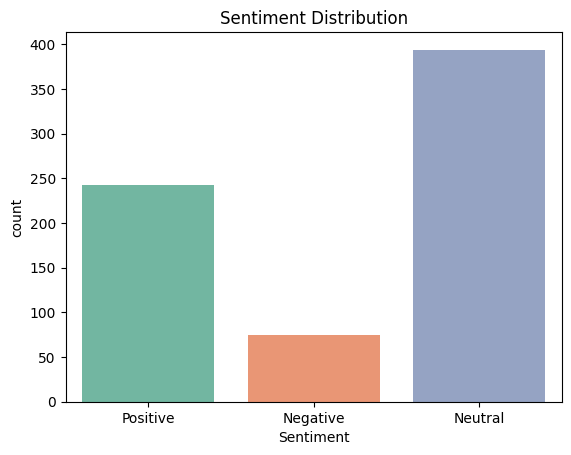

In [12]:
sns.countplot(x='Sentiment', hue='Sentiment', data=df,
              palette="Set2", legend=False)

plt.title("Sentiment Distribution")
plt.show()

## **Step 3: Sentiment Distribution**
Analyzed how many posts are **Positive, Negative, or Neutral**.  

The raw dataset contained 175 unique sentiment/emotion labels, mixing broad categories
(Positive, Neutral, Negative) with detailed emotions and descriptive phrases (e.g., *enjoyment*, *thrilling*, *celestial*, *wonder*, *uncertain*).  

To make the analysis meaningful, all emotions was grouped into 3 buckets:
- **Positive:** Joy, Happiness, Love, Excitement, Gratitude, etc.
- **Negative:** Anger, Fear, Sadness, Disgust, Disappointment, etc.
- **Neutral:** Acceptance, Calm, Ordinary, Balanced, etc.

This transformation reduced noise and allowed to produce clear visualizations.
This made the sentiment plots vs engagement (Likes, Retweets) clean and interpretable.

This shows the dataset’s class balance, which is important for future modeling.

# 5️⃣ **Engagement Analysis**
### **Likes & Retweets by Sentiment**

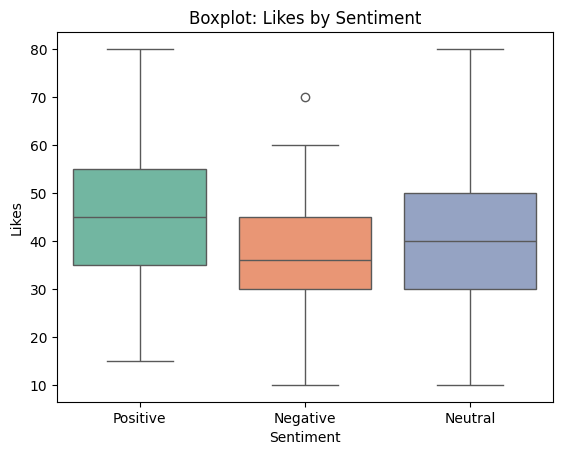

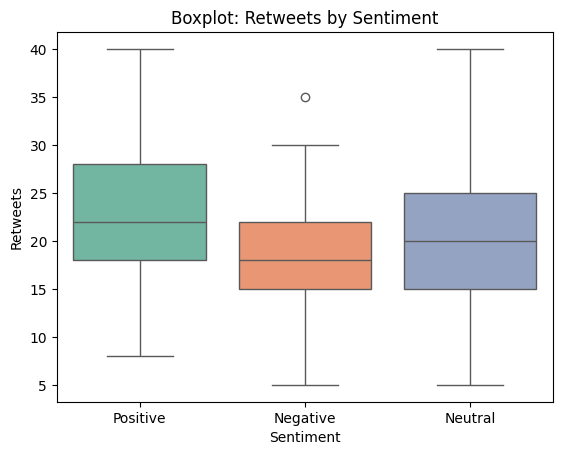

In [13]:
# Likes by Sentiment
sns.boxplot(x='Sentiment', y='Likes', hue='Sentiment', data=df, palette="Set2", legend=False)
plt.title("Boxplot: Likes by Sentiment")
plt.show()

# Retweets by Sentiment
sns.boxplot(x='Sentiment', y='Retweets', hue='Sentiment', data=df, palette="Set2", legend=False)
plt.title("Boxplot: Retweets by Sentiment")
plt.show()

## **Step 4: Engagement by Sentiment**
Compared **Likes and Retweets** across sentiment categories.  
This reveals whether **positive, negative, or neutral posts get more engagement**.

# 6️⃣ **Platform Analysis**

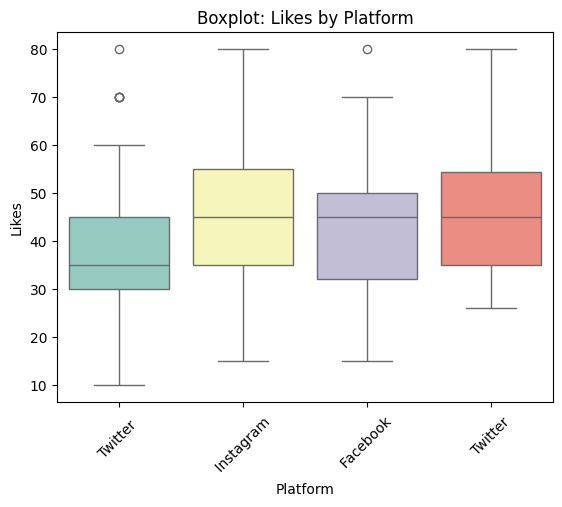

In [14]:
sns.boxplot(x='Platform', y='Likes', hue='Platform', data=df, palette="Set3", legend=False)
plt.title("Boxplot: Likes by Platform")
plt.xticks(rotation=45)
plt.show()

## **Step 5: Platform-wise Sentiment**
We examined how sentiment is distributed across **Twitter, Facebook, Instagram**.  
This highlights platform differences in tone and engagement.

# 7️⃣ **Time Trends**

### **Posts by hour**

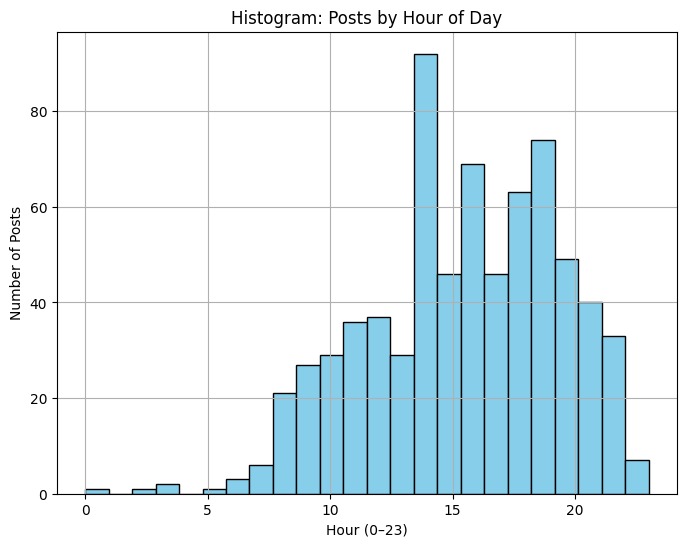

In [15]:
plt.figure(figsize=(8,6))
df['Hour'].hist(bins=24, color='skyblue', edgecolor='black')
plt.title("Histogram: Posts by Hour of Day")
plt.xlabel("Hour (0–23)")
plt.ylabel("Number of Posts")
plt.show()

## **Step 6: Temporal Patterns**
We analyzed **what times of the day different sentiments appear most frequently**.  
This reveals daily activity cycles and peak posting times.

# 8️⃣ **Geographic Analysis**

In [16]:
df['Country'].unique()

array([' USA      ', ' Canada   ', ' USA        ', ' UK       ',
       ' Australia ', ' India    ', ' USA    ', 'USA', ' Canada    ',
       ' USA       ', ' USA ', ' Canada  ', ' UK ', ' India     ',
       ' Canada ', ' UK        ', ' India ', ' UK   ', ' UK         ',
       ' USA     ', ' Canada     ', ' USA          ', ' India      ',
       ' Australia  ', ' UK           ', ' Canada       ',
       ' Australia   ', ' Australia    ', ' UK            ', ' USA   ',
       ' India       ', ' UK          ', ' USA  ', ' UK      ',
       ' Canada      ', ' India   ', ' Canada          ',
       ' India        ', ' Australia     ', ' Canada        ',
       ' India         ', ' USA           ', ' USA               ',
       ' Canada            ', ' UK                ',
       ' India              ', ' Australia          ',
       ' France            ', ' Brazil            ',
       ' Japan             ', ' Greece            ',
       ' India             ', ' Brazil           ', ' Franc

In [17]:
country_counts = df['Country'].value_counts().reset_index()
country_counts.columns = ['Country', 'Count']
country_counts

,Country,Count
0,USA,59
1,USA,51
2,UK,49
3,Canada,44
4,Australia,36
...,...,...
110,Ireland,1
111,Scotland,1
112,Kenya,1
113,Jamaica,1


In [18]:
# Strip Whitespace + Standardize
df['Country'] = df['Country'].str.strip().str.upper()

In [19]:
# Re-check Counts
country_counts = df['Country'].value_counts().reset_index()
country_counts.columns = ['Country', 'Count']
country_counts

,Country,Count
0,USA,184
1,UK,140
2,CANADA,132
3,AUSTRALIA,70
4,INDIA,68
5,BRAZIL,17
6,FRANCE,16
7,JAPAN,15
8,GERMANY,14
9,ITALY,11


In [20]:
# Group Top N vs Other
# Take top 5
top_countries = df['Country'].value_counts().nlargest(5).index

# Create grouped column
df['Country_grouped'] = df['Country'].apply(lambda x: x if x in top_countries else 'Other')

# Verify
df['Country_grouped'].value_counts()

,count
Country_grouped,
USA,184
UK,140
CANADA,132
Other,118
AUSTRALIA,70
INDIA,68


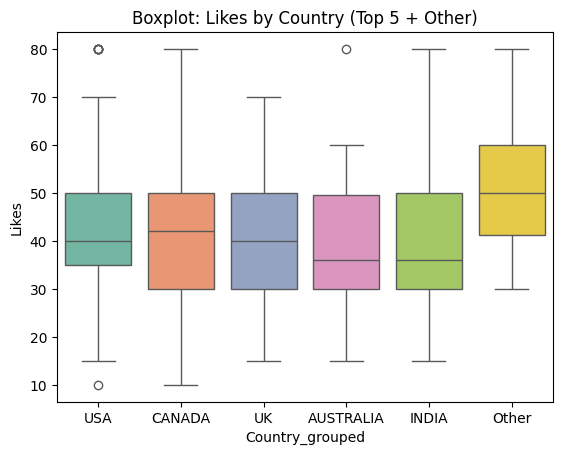

In [21]:
sns.boxplot(x='Country_grouped', y='Likes', hue='Country_grouped',
            data=df, palette="Set2", legend=False)

plt.title("Boxplot: Likes by Country (Top 5 + Other)")
plt.show()

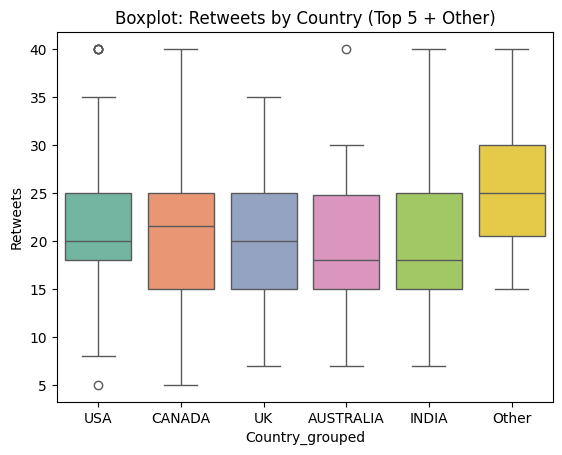

In [22]:
sns.boxplot(x='Country_grouped', y='Retweets', hue='Country_grouped',
            data=df, palette="Set2", legend=False)

plt.title("Boxplot: Retweets by Country (Top 5 + Other)")
plt.show()

## **Step 7: Geographic Sentiment Analysis (Cleaning & Grouping)**

I explored how sentiment and engagement vary across **different countries** in the dataset.

The original dataset contained too many unique country entries, many of which were messy due
to trailing spaces and inconsistent formatting (e.g., "USA", " USA  ", "Usa").  
I cleaned the column by standardizing country names and consolidating duplicates.  

To simplify visualization, I grouped the data into the **Top 5 countries by post count**
and labeled the rest as "Other". This balances readability with interpretability
while still capturing the key geographies.  

This provides an international perspective on user mood and engagement,
while avoiding clutter in the plots.

# 9️⃣ **Correlations**

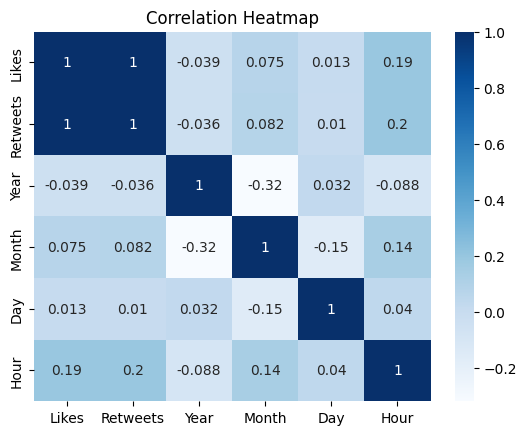

In [23]:
corr = df[['Likes','Retweets','Year','Month','Day','Hour']].corr()
sns.heatmap(corr, annot=True, cmap="Blues")
plt.title("Correlation Heatmap")
plt.show()

## **Step 8: Correlation Analysis**
We generated a correlation heatmap to examine relationships between numeric variables like **Likes, Retweets, and Time features**.  
This helps identify whether engagement patterns are time-dependent.

# 🔟 **Conclusion**

### **Key insights from this EDA include:**  
- The dataset is balanced/imbalanced across sentiment classes.  
- [Example: Positive posts tend to get more Likes than Negative ones.]  
- Engagement (Likes/Retweets) varies significantly by platform.  
- Posting time (hour of day) influences sentiment distribution.  
- Country-level analysis shows variations in sentiment expression.  

This analysis sets the foundation for more advanced tasks such as predictive modeling or sentiment classification.